In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Загружаем набор данных 'diamonds' из библиотеки seaborn

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Анализируем структуру датасета

**Наименование полей:**
*   **carat** - вес в каратах;
*   **cut** - качество огранки (Удовлетворительное, Хорошее, Очень хорошее, Премиум, Идеальное);
*   **color** - цвет от J до D (определяется по Международной системе GIA https://diams.ru/GIA-cvet-brillianta)
*   **clarity** - чистота/прозрачность (I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший))
*   **depth** - общая толщина в процентах = z / mean(x, y) = 2 * z / (x + y)(43--79)
*   **table** - ширина вершины брилианта относительно самого широкого места (43–95)
*   **price** - цена;
*   **x** - длина, мм;
*   **y** - ширина, мм;
*   **z** - толщина, мм.

In [ ]:
diamonds.shape

(53940, 10)

In [ ]:
diamonds.describe()
#Почему есть x, y и z с нулевыми значениями

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#Выведем названия колонок
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
#Посмотрим типы данных
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53794 non-null  float64 
 1   cut      53794 non-null  category
 2   color    53794 non-null  category
 3   clarity  53794 non-null  category
 4   depth    53794 non-null  float64 
 5   table    53794 non-null  float64 
 6   price    53794 non-null  int64   
 7   x        53794 non-null  float64 
 8   y        53794 non-null  float64 
 9   z        53794 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [ ]:
#Проверяем на пропуски
diamonds.isnull().any().any()


False

In [ ]:
#Проверям дублирующиеся значения
diamonds.duplicated().sum()

146

In [ ]:
#Найдено 146 дублирующихся строк. Сразу очистим датасет от дублей
diamonds = diamonds.drop_duplicates()
diamonds.shape

(53794, 10)

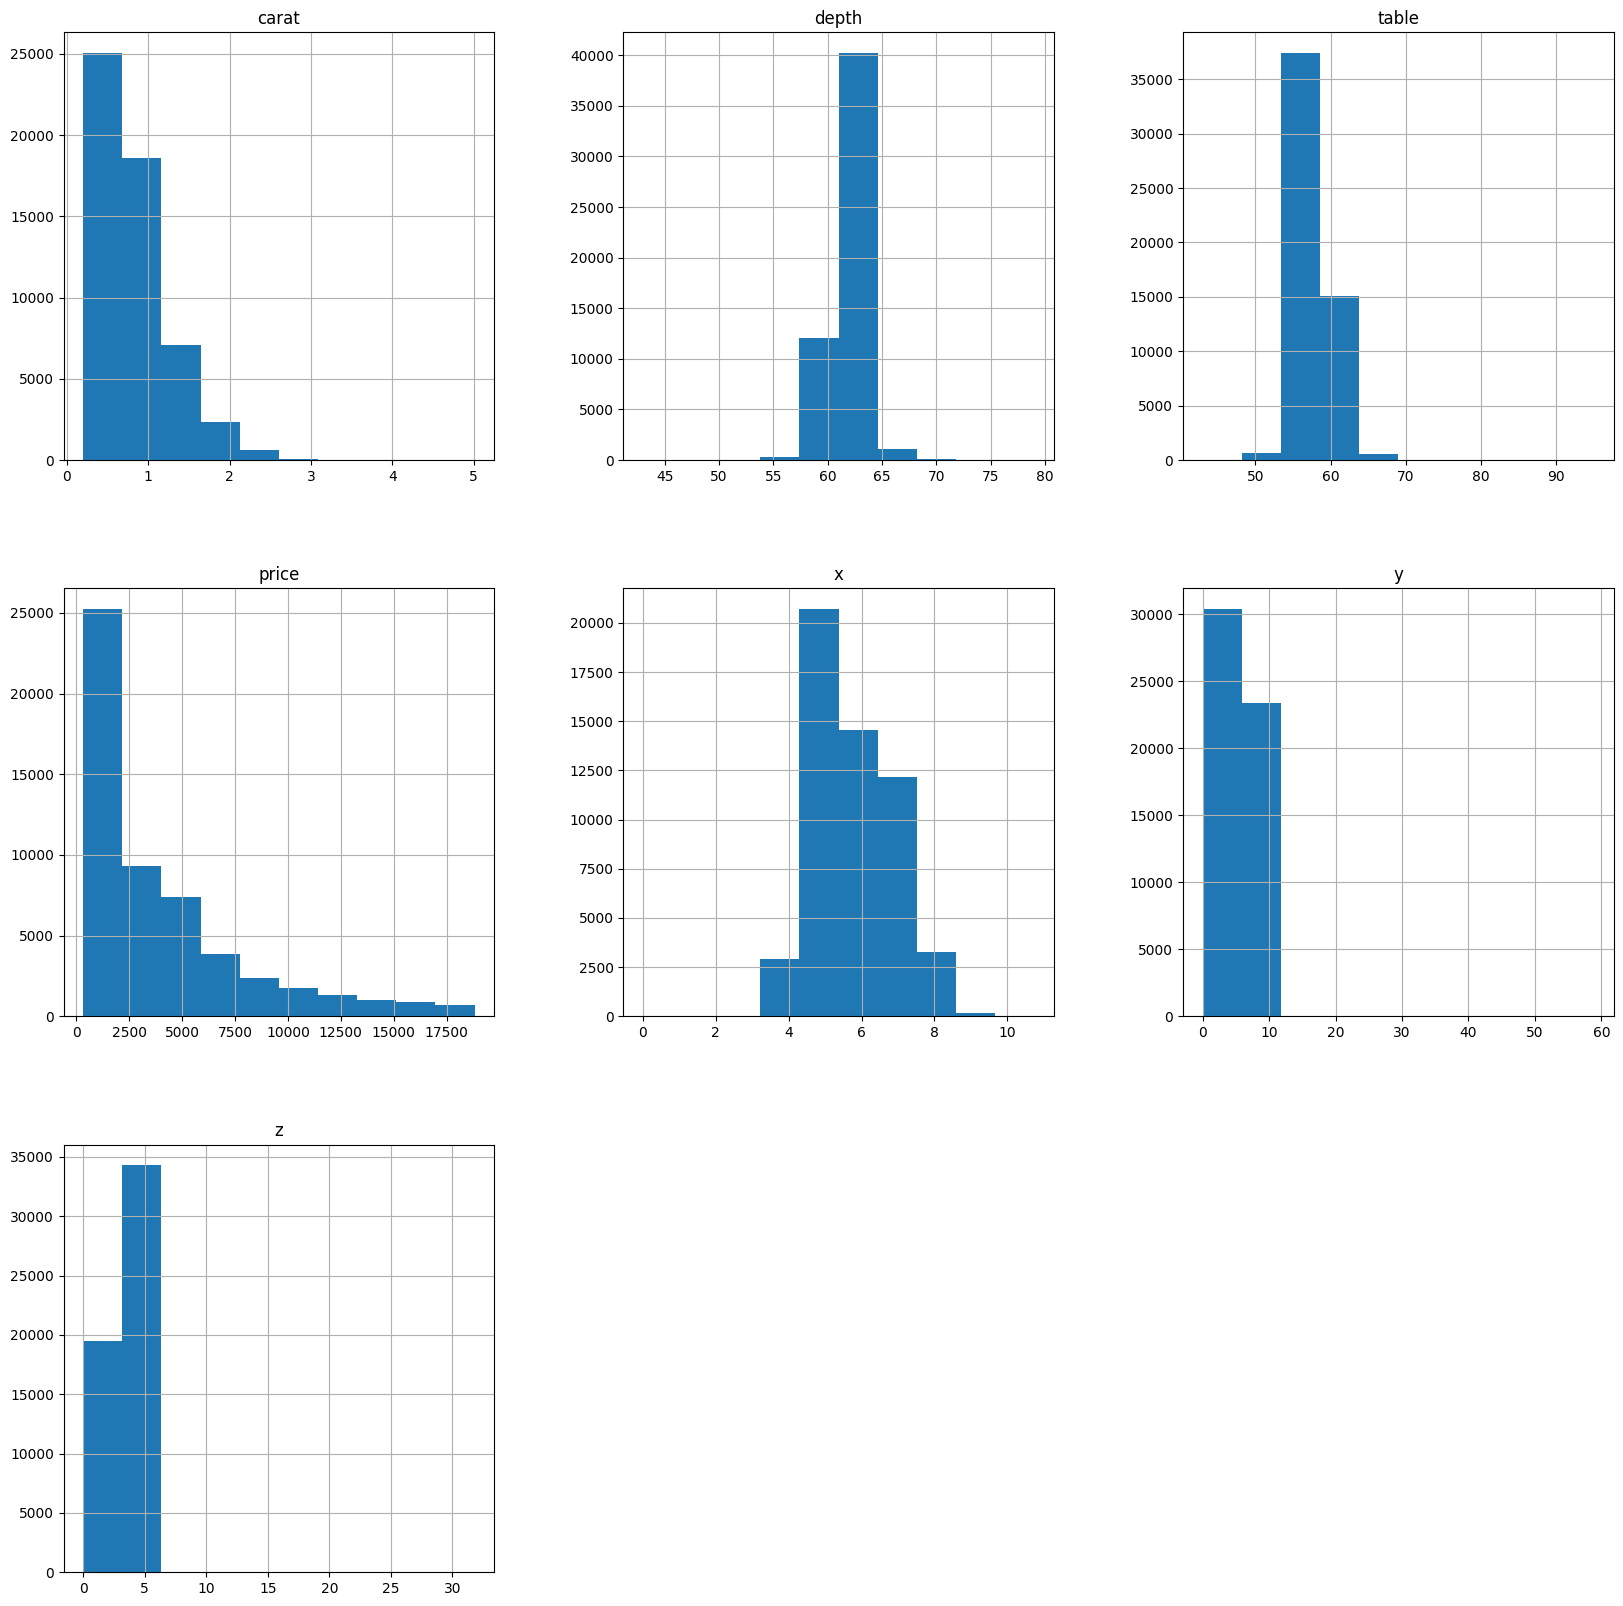

In [ ]:
#Посмотрим раапределение по весу, качеству, цвету и цене
diamonds.hist(figsize=(20, 20))
plt.show()

<ipython-input-24-f07f63fbd7c3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=diamonds[factors].corr()


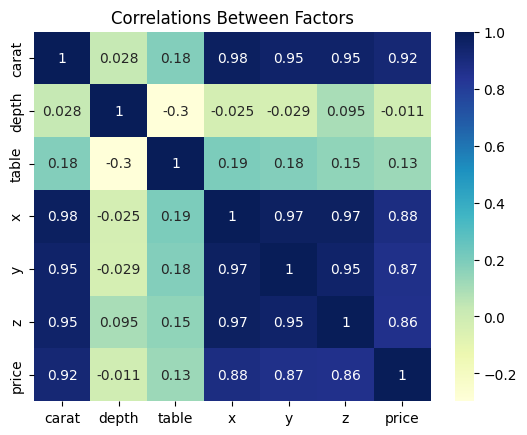

In [ ]:
# Create list of Factors
factors = ['carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y', 'z','price']

# Find the Correlations between the factors.
corr_matrix=diamonds[factors].corr()

# Create a Chart for the 6 Factors Correlations
sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")
plt.title(('Correlations Between Factors'));

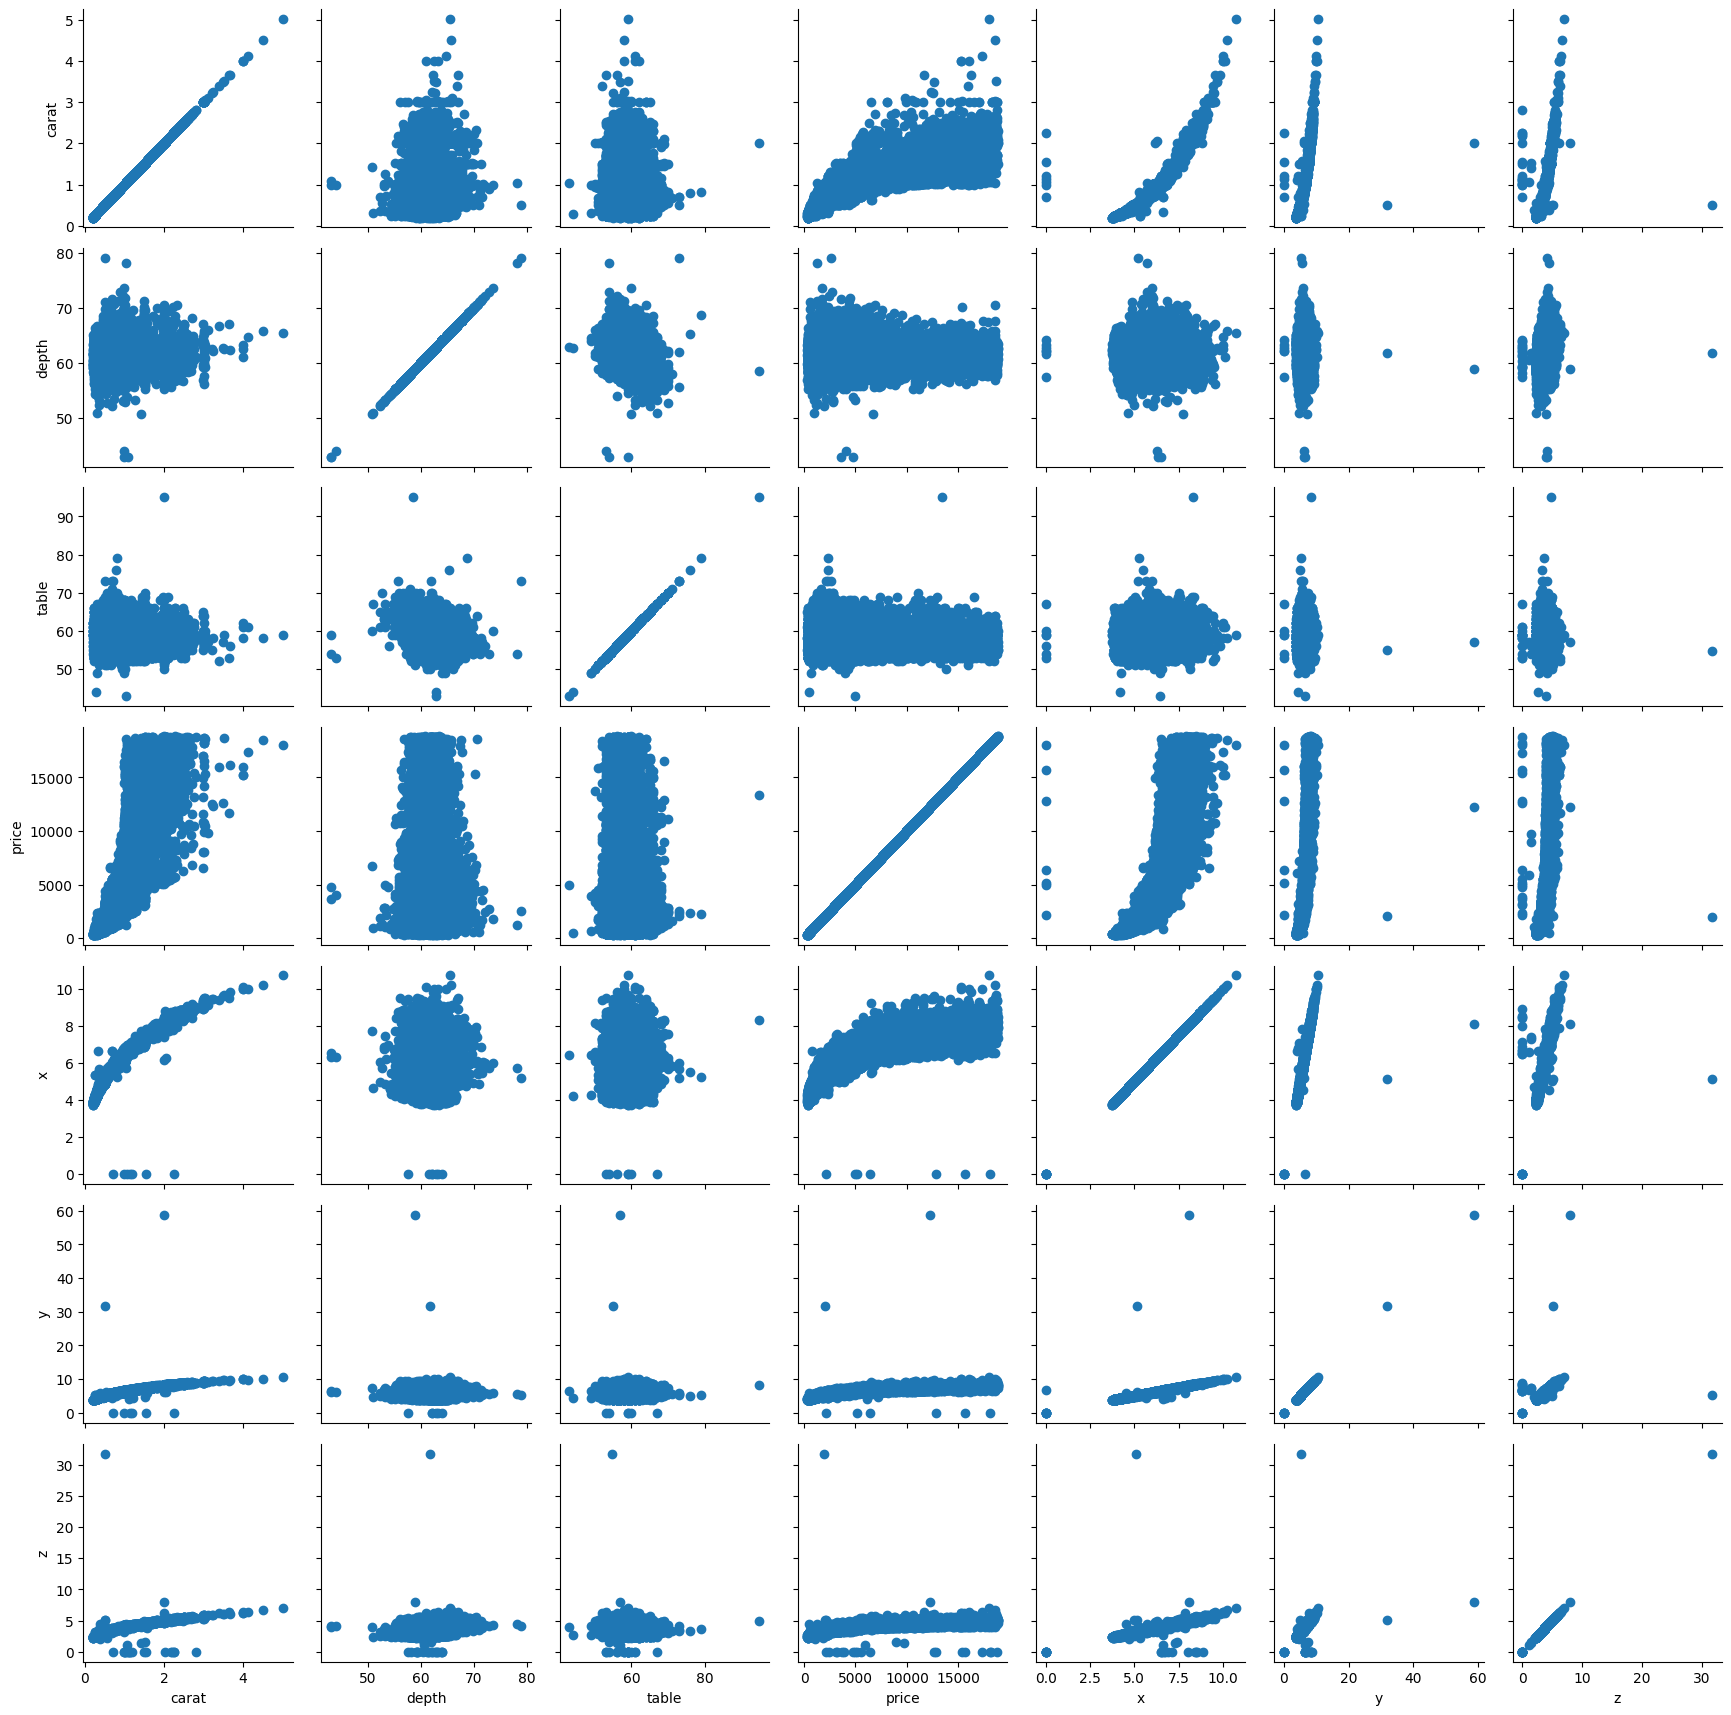

In [ ]:
pair_grid_plot = sns.PairGrid(diamonds)
pair_grid_plot.map(plt.scatter)

In [ ]:
'''if row['x'] or row['y'] or row['z'] == 0:
  diamonds['density'] = diamond.apply('---')

diamonds['density'] = diamonds.apply(lambda row: row['carat'] / (row['x'] * row['y'] * row['z']), axis = 1)
diamonds.head()
for i in range(len(df)):
    df['wq'] = i*5
'''
for i in range(len(diamonds)):
  if diamonds['x'] == 0 or diamonds['y'] == 0 or diamonds['z'] == 0:
    diamonds['density'] = '---'
  else:
    diamonds['dansity'] = diamonds['carat']/(diamonds['x'] * diamonds['y'] * diamonds['z'])


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
diamonds.iloc[2].loc['x']
for i in range(len(diamonds)):
  if diamonds.iloc[i].loc['x'] == 0 or diamonds.iloc[i].loc['y'] == 0 or diamonds.iloc[i].loc['x'] == 0:
     diamonds = diamonds.assign(dansity = '---')
  else:
    diamonds = diamonds.assign(dansity = diamonds['carat'] / (diamonds['x'] * diamonds['y'] * diamonds['z']))



In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,dansity,density
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.006021,---
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.006086,---
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.006040,---
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.006207,---
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.005971,---


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:

diamonds['rer'] = diamonds.apply(lambda row: row['carat'] / row['x'] if row['x'] != 0, axis=1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().